#**PyTorch VI**
Autor: Jheremy Reyes,

estudiante de matemáticas,

Universidad El Bosque

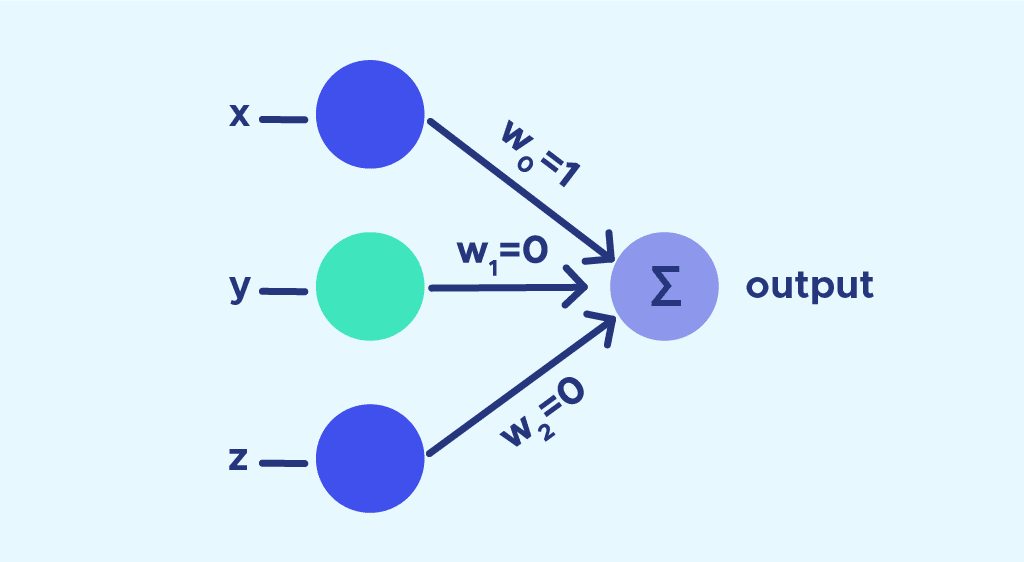

##**Implementación de un Perceptrón Multicapa (MLP) en PyTorch**

Un Perceptrón Multicapa (MLP) es una red neuronal totalmente conectada (Feedforward Neural Network). Consiste en:

Una capa de entrada.

Una o más capas ocultas con activación no lineal (ReLU, Sigmoid, etc.).

Una capa de salida para clasificación o regresión.

A continuación, te muestro cómo implementar un MLP en PyTorch para clasificación binaria.

In [ ]:
import torch
import torch.nn as nn

# Definir las capas de la red neuronal
layer1 = nn.Linear(3, 2)  # Entrada de tamaño 3, salida de tamaño 2
layer2 = nn.Linear(2, 3)  # Entrada de tamaño 2, salida de tamaño 3
layer3 = nn.Linear(3, 4)  # Entrada de tamaño 3, salida de tamaño 4

# Funciones de activación
relu = nn.ReLU()
sigmoid = nn.Sigmoid()

# Crear un tensor de prueba (equivalente a tf.ones((3,3)))
x = torch.ones((3, 3))

# Aplicar las capas secuencialmente
y = layer3(sigmoid(layer2(relu(layer1(x)))))
print(y)


tensor([[-0.5356, -0.1889, -0.1857,  0.8926],
        [-0.5356, -0.1889, -0.1857,  0.8926],
        [-0.5356, -0.1889, -0.1857,  0.8926]], grad_fn=<AddmmBackward0>)


In [ ]:
# Definir el modelo equivalente en PyTorch
class MyFirstModel(nn.Module):
    def __init__(self):
        super(MyFirstModel, self).__init__()
        self.layer1 = nn.Linear(3, 2)  # Equivalente a Dense(2, activation="relu")
        self.layer2 = nn.Linear(2, 3)  # Equivalente a Dense(3, activation="sigmoid")
        self.layer3 = nn.Linear(3, 4)  # Equivalente a Dense(4)

        # Funciones de activación
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.layer1(x))   # Aplicar ReLU después de la primera capa
        x = self.sigmoid(self.layer2(x))  # Aplicar Sigmoid después de la segunda capa
        x = self.layer3(x)  # Tercera capa sin activación
        return x

# Crear una instancia del modelo
model = MyFirstModel()

# Crear un tensor de entrada (equivalente a tf.ones((3,3)))
x = torch.ones((3, 3))

# Pasar los datos a través del modelo
y = model(x)
print(y)


tensor([[ 0.1312,  0.6151, -0.5518,  0.0158],
        [ 0.1312,  0.6151, -0.5518,  0.0158],
        [ 0.1312,  0.6151, -0.5518,  0.0158]], grad_fn=<AddmmBackward0>)


In [ ]:
# Lista de capas en el modelo PyTorch
print(list(model.children()))  # Obtiene las capas definidas en el modelo


[Linear(in_features=3, out_features=2, bias=True), Linear(in_features=2, out_features=3, bias=True), Linear(in_features=3, out_features=4, bias=True), ReLU(), Sigmoid()]


In [ ]:
# Acceder a los pesos de la tercera capa (layer3 en este caso)
weights = model.layer3.weight  # Pesos de la capa
bias = model.layer3.bias  # Bias de la capa

# Imprimir pesos y bias
print("Pesos de la capa 3:\n", weights)
print("Bias de la capa 3:\n", bias)


Pesos de la capa 3:
 Parameter containing:
tensor([[-0.0861, -0.2165,  0.3963],
        [-0.5207,  0.5544, -0.2644],
        [-0.3177,  0.2325, -0.3915],
        [ 0.2440,  0.5245, -0.0993]], requires_grad=True)
Bias de la capa 3:
 Parameter containing:
tensor([ 0.1407,  0.5733, -0.4239, -0.3538], requires_grad=True)


Definimos la red en InitialModel, equivalente al modelo Sequential en Keras.

nn.Linear(in_features, out_features) se usa en lugar de Dense(units, activation=...).

forward() maneja la propagación, aplicando las activaciones manualmente.

El resumen se genera con torchinfo.summary(), similar a model.summary().

In [ ]:
pip install torchsummary


In [ ]:
import torch
import torch.nn as nn
from torchsummary import summary  # Asegúrate de tener instalado torchsummary

# Definir el modelo en PyTorch
class InitialModel(nn.Module):
    def __init__(self):
        super(InitialModel, self).__init__()
        self.layer1 = nn.Linear(3, 2)
        self.layer2 = nn.Linear(2, 3)
        self.layer3 = nn.Linear(3, 4)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.sigmoid(self.layer2(x))
        x = self.layer3(x)
        return x

# Crear el modelo
initial_model = InitialModel()

# Mostrar resumen del modelo
summary(initial_model, input_size=(3,))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 2]               8
              ReLU-2                    [-1, 2]               0
            Linear-3                    [-1, 3]               9
           Sigmoid-4                    [-1, 3]               0
            Linear-5                    [-1, 4]              16
Total params: 33
Trainable params: 33
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [ ]:
# Definir un tensor de entrada de prueba
x = torch.randn(1, 3)  # Simula una entrada de tamaño (1,3)

# Pasar la entrada al modelo
output = initial_model(x)

# Mostrar la forma de la entrada
print("Forma de la entrada:", x.shape)


Forma de la entrada: torch.Size([1, 3])


In [ ]:
# Definir un tensor de entrada de prueba
x = torch.randn(1, 3)  # Simula una entrada de tamaño (batch=1, features=3)

# Obtener la salida del modelo
output = initial_model(x)

# Mostrar la salida y su forma
print("Salida del modelo:\n", output)
print("Forma de la salida:", output.shape)


Salida del modelo:
 tensor([[-0.0920, -0.0161,  0.2709, -0.0564]], grad_fn=<AddmmBackward0>)
Forma de la salida: torch.Size([1, 4])


En TensorFlow/Keras, model.trainable_variables devuelve una lista con los pesos y sesgos entrenables del modelo.

En PyTorch, el equivalente es model.parameters(), que devuelve los tensores de los parámetros entrenables.

In [ ]:
# Definir el modelo en PyTorch
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.layer1 = nn.Linear(3, 2)  # Equivalente a Dense(2, activation="relu")
        self.layer2 = nn.Linear(2, 3)  # Equivalente a Dense(3, activation="sigmoid")
        self.layer3 = nn.Linear(3, 4)  # Equivalente a Dense(4, activation="relu")

        # Activaciones
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.layer1(x))   # ReLU después de la primera capa
        x = self.sigmoid(self.layer2(x))  # Sigmoid después de la segunda capa
        x = self.relu(self.layer3(x))  # ReLU después de la tercera capa
        return x

# Crear el modelo
model = MyModel()

# Resumen del modelo
summary(model, input_size=(1, 3))  # Input con batch_size=1 y 3 features

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 2]               8
              ReLU-2                 [-1, 1, 2]               0
            Linear-3                 [-1, 1, 3]               9
           Sigmoid-4                 [-1, 1, 3]               0
            Linear-5                 [-1, 1, 4]              16
              ReLU-6                 [-1, 1, 4]               0
Total params: 33
Trainable params: 33
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [ ]:
# Obtener los parámetros entrenables del modelo
for name, param in model.named_parameters():
    if param.requires_grad:  # Solo muestra los parámetros entrenables
        print(f"Nombre: {name}, Forma: {param.shape}")

Nombre: layer1.weight, Forma: torch.Size([2, 3])
Nombre: layer1.bias, Forma: torch.Size([2])
Nombre: layer2.weight, Forma: torch.Size([3, 2])
Nombre: layer2.bias, Forma: torch.Size([3])
Nombre: layer3.weight, Forma: torch.Size([4, 3])
Nombre: layer3.bias, Forma: torch.Size([4])


En TensorFlow/Keras, model.layers permite iterar sobre las capas de un modelo Sequential, y layer.trainable indica si los parámetros de la capa se pueden entrenar.

En PyTorch, el equivalente es iterar sobre model.children() y verificar requires_grad en los parámetros de cada capa.

In [ ]:
# Iterar sobre las capas del modelo y verificar si son entrenables
for name, layer in model.named_children():
    trainable = any(param.requires_grad for param in layer.parameters())
    print(f"Capa: {name}, Entrenable: {trainable}")

Capa: layer1, Entrenable: True
Capa: layer2, Entrenable: True
Capa: layer3, Entrenable: True
Capa: relu, Entrenable: False
Capa: sigmoid, Entrenable: False


En TensorFlow/Keras, la propiedad model.trainable = False congela todas las capas del modelo, haciendo que model.trainable_variables devuelva una lista vacía.

En PyTorch, el equivalente es desactivar requires_grad en todos los parámetros del modelo.

In [ ]:
# Congelar todos los parámetros del modelo
for param in model.parameters():
    param.requires_grad = False

# Verificar los parámetros entrenables después de la congelación
trainable_params = [param for param in model.parameters() if param.requires_grad]
print("Parámetros entrenables:", len(trainable_params))  # Debe ser 0 si todo está congelado

Parámetros entrenables: 0


En TensorFlow/Keras, puedes iterar sobre model.layers y verificar si cada capa es entrenable con layer.trainable.

En PyTorch, no existe model.layers, pero puedes usar model.children() o model.named_children() para acceder a las capas y verificar si sus parámetros son entrenables.

In [ ]:
# Iterar sobre las capas del modelo y verificar si son entrenables
for name, layer in model.named_children():
    trainable = any(param.requires_grad for param in layer.parameters())
    print(f"Capa: {name}, Entrenable: {trainable}")

Capa: layer1, Entrenable: False
Capa: layer2, Entrenable: False
Capa: layer3, Entrenable: False
Capa: relu, Entrenable: False
Capa: sigmoid, Entrenable: False


In [ ]:
# Definir el modelo en PyTorch
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.layer1 = nn.Linear(3, 2)  # Equivalente a Dense(2, activation="relu")
        self.layer2 = nn.Linear(2, 3)  # Equivalente a Dense(3, activation="sigmoid")
        self.layer3 = nn.Linear(3, 4)  # Equivalente a Dense(4, activation="relu")
        self.layer4 = nn.Linear(4, 5)  # Equivalente a Dense(5, activation="relu")
        self.layer5 = nn.Linear(5, 6)  # Equivalente a Dense(6, activation="sigmoid")
        self.layer6 = nn.Linear(6, 7)  # Equivalente a Dense(7, activation="relu")

        # Activaciones
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.layer1(x))   # ReLU después de la primera capa
        x = self.sigmoid(self.layer2(x))  # Sigmoid después de la segunda capa
        x = self.relu(self.layer3(x))  # ReLU después de la tercera capa
        x = self.relu(self.layer4(x))  # ReLU después de la cuarta capa
        x = self.sigmoid(self.layer5(x))  # Sigmoid después de la quinta capa
        x = self.relu(self.layer6(x))  # ReLU después de la sexta capa
        return x

# Crear el modelo
model = MyModel()

# Resumen del modelo
summary(model, input_size=(1, 3))  # Input con batch_size=1 y 3 features

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 2]               8
              ReLU-2                 [-1, 1, 2]               0
            Linear-3                 [-1, 1, 3]               9
           Sigmoid-4                 [-1, 1, 3]               0
            Linear-5                 [-1, 1, 4]              16
              ReLU-6                 [-1, 1, 4]               0
            Linear-7                 [-1, 1, 5]              25
              ReLU-8                 [-1, 1, 5]               0
            Linear-9                 [-1, 1, 6]              36
          Sigmoid-10                 [-1, 1, 6]               0
           Linear-11                 [-1, 1, 7]              49
             ReLU-12                 [-1, 1, 7]               0
Total params: 143
Trainable params: 143
Non-trainable params: 0
---------------------------------------

En TensorFlow/Keras, la API funcional permite extraer características de un modelo definiendo una nueva arquitectura con entradas y salidas específicas.

En PyTorch, puedes hacer algo similar accediendo directamente a las capas del modelo en forward().

In [ ]:
# Definir el modelo base en PyTorch
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.layer1 = nn.Linear(3, 2)
        self.layer2 = nn.Linear(2, 3)
        self.layer3 = nn.Linear(3, 4)
        self.layer4 = nn.Linear(4, 5)  # Salida deseada del extractor
        self.layer5 = nn.Linear(5, 6)
        self.layer6 = nn.Linear(6, 7)

        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x, return_features=False):
        x = self.relu(self.layer1(x))
        x = self.sigmoid(self.layer2(x))
        x = self.relu(self.layer3(x))
        features = self.relu(self.layer4(x))  # Extracción en "layer4"

        if return_features:
            return features  # Devuelve solo hasta "layer4"

        x = self.sigmoid(self.layer5(features))
        x = self.relu(self.layer6(x))
        return x

# Crear el modelo base
model = MyModel()

# Crear el "feature extractor"
def feature_extractor(x):
    return model(x, return_features=True)

# Prueba con una entrada
x_test = torch.randn(1, 3)  # Entrada de prueba (batch_size=1, features=3)
features = feature_extractor(x_test)

print("Salida del extractor de características:\n", features)

Salida del extractor de características:
 tensor([[0.0000, 0.4983, 0.0427, 0.8068, 0.6914]], grad_fn=<ReluBackward0>)


En Keras, feature_extractor.summary() muestra el resumen del modelo intermedio.

En PyTorch, puedes usar torchinfo.summary() para obtener información similar.

In [ ]:
!pip install torchinfo


Este código define un modelo de red neuronal simple usando PyTorch, y luego genera un resumen de su arquitectura utilizando la librería torchinfo. También se asegura de que el modelo se ejecute en la GPU si está disponible (de lo contrario, en la CPU).

In [ ]:
import torch
import torch.nn as nn
from torchinfo import summary  # Ojo: diferente de torchsummary

# Verificar el dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Modelo ejemplo
class InitialModel(nn.Module):
    def __init__(self):
        super(InitialModel, self).__init__()
        self.layer1 = nn.Linear(3, 2)
        self.layer2 = nn.Linear(2, 3)
        self.layer3 = nn.Linear(3, 4)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.sigmoid(self.layer2(x))
        x = self.layer3(x)
        return x

# Instanciar modelo y moverlo al dispositivo
model = InitialModel().to(device)

# Usar torchinfo.summary
summary(model, input_size=(1, 3), depth=4, device=device)


Layer (type:depth-idx)                   Output Shape              Param #
InitialModel                             [1, 4]                    --
├─Linear: 1-1                            [1, 2]                    8
├─ReLU: 1-2                              [1, 2]                    --
├─Linear: 1-3                            [1, 3]                    9
├─Sigmoid: 1-4                           [1, 3]                    --
├─Linear: 1-5                            [1, 4]                    16
Total params: 33
Trainable params: 33
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

En TensorFlow/Keras, tf.keras.utils.plot_model() genera un diagrama visual del modelo.

En PyTorch, no hay un equivalente directo pero se puede usar torchviz o hiddenlayer para visualizar la arquitectura.

**¿Qué es torchviz?**

torchviz es una herramienta de visualización para modelos de PyTorch. Permite dibujar el grafo computacional de un modelo, es decir, representar gráficamente cómo se conectan las operaciones (capas, funciones, etc.) desde la entrada hasta la salida. Esto es especialmente útil para:

Verificar la estructura de una red neuronal.
Depurar errores relacionados con las dimensiones o conexiones.
Enseñar o presentar cómo fluye la información en el modelo.

**¿Para qué usar torchviz?**

- Comprender modelos complejos.
- Presentar gráficamente redes neuronales en clases o papers.
- Detectar errores en la construcción del modelo.
- Visualizar redes recurrentes, convolucionales o personalizadas.

In [ ]:
pip install torchviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

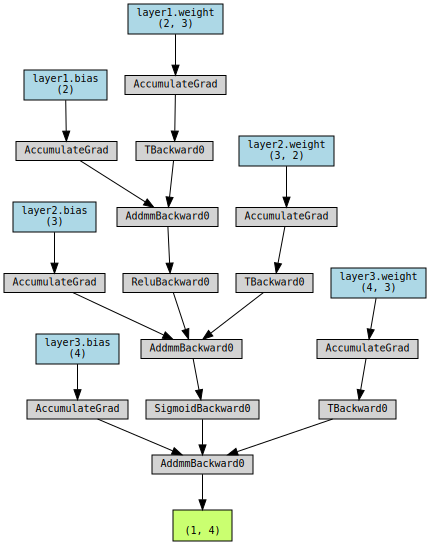

In [ ]:
import torch
from torchviz import make_dot

# Entrada de ejemplo
x_sample = torch.randn(1, 3)

# Obtener la salida del modelo
y_sample = model(x_sample)

# Generar el diagrama
dot = make_dot(y_sample, params=dict(model.named_parameters()))

# Guardar la imagen
dot.format = "png"
dot.render("model")

# Mostrar en Jupyter Notebook (si lo estás usando)
dot


nn.Linear(in_features, out_features) es el equivalente de Dense(units).

Activaciones (ReLU y Softmax) se aplican en forward(), ya que PyTorch no las incluye dentro de Linear().

Resumen del modelo se obtiene con torchinfo.summary().

In [ ]:
# Definir el modelo en PyTorch
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(784, 64)  # Capa densa de 64 neuronas
        self.fc2 = nn.Linear(64, 64)   # Otra capa de 64 neuronas
        self.fc3 = nn.Linear(64, 10)   # Capa de salida con 10 clases

        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)  # Softmax en la dimensión de las clases

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.softmax(self.fc3(x))
        return x

# Crear el modelo
model = MyModel()

# Mostrar resumen del modelo
summary(model, input_size=(1, 784))


Layer (type:depth-idx)                   Output Shape              Param #
MyModel                                  [1, 10]                   --
├─Linear: 1-1                            [1, 64]                   50,240
├─ReLU: 1-2                              [1, 64]                   --
├─Linear: 1-3                            [1, 64]                   4,160
├─ReLU: 1-4                              [1, 64]                   --
├─Linear: 1-5                            [1, 10]                   650
├─Softmax: 1-6                           [1, 10]                   --
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.06
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.22
Estimated Total Size (MB): 0.22

Se aplanan las imágenes de (32, 32, 3) a 3072 (x.view(x.size(0), -1)).

Se replican las conexiones residuales (torch.add()) en block_2_output y block_3_output.

Las activaciones (ReLU, Softmax) se aplican manualmente en forward().

Se mantiene Dropout(0.5) antes de la salida.

Resumen del modelo se obtiene con torchinfo.summary().

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchinfo import summary


# Definir el modelo en PyTorch
class VeryDenseNet(nn.Module):
    def __init__(self):
        super(VeryDenseNet, self).__init__()

        # Bloque 1
        self.fc1 = nn.Linear(32 * 32 * 3, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)  # block_1_output

        # Bloque 2
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, 64)

        # Bloque 3
        self.fc6 = nn.Linear(64, 32)
        self.fc7 = nn.Linear(32, 64)

        # Capa de salida
        self.fc8 = nn.Linear(64, 16)
        self.fc9 = nn.Linear(16, 32)
        self.fc10 = nn.Linear(32, 256)
        self.fc_out = nn.Linear(256, 10)

        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Aplanar la imagen (32x32x3 → 3072)

        # Bloque 1
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        block_1_output = F.relu(self.fc3(x))

        # Bloque 2 con skip connection
        x = F.relu(self.fc4(block_1_output))
        x = F.relu(self.fc5(x))
        block_2_output = torch.add(x, block_1_output)  # Residual sum

        # Bloque 3 con skip connection
        x = F.relu(self.fc6(block_2_output))
        x = F.relu(self.fc7(x))
        block_3_output = torch.add(x, block_2_output)  # Residual sum

        # Capas finales
        x = F.relu(self.fc8(block_3_output))
        x = F.relu(self.fc9(x))
        x = F.relu(self.fc10(x))
        x = self.dropout(x)  # Dropout antes de la salida
        x = F.softmax(self.fc_out(x), dim=1)  # Softmax para clasificación

        return x

# Crear el modelo
model = VeryDenseNet()

# Resumen del modelo
summary(model, input_size=(1, 3, 32, 32))


Layer (type:depth-idx)                   Output Shape              Param #
VeryDenseNet                             [1, 10]                   --
├─Linear: 1-1                            [1, 64]                   196,672
├─Linear: 1-2                            [1, 64]                   4,160
├─Linear: 1-3                            [1, 64]                   4,160
├─Linear: 1-4                            [1, 32]                   2,080
├─Linear: 1-5                            [1, 64]                   2,112
├─Linear: 1-6                            [1, 32]                   2,080
├─Linear: 1-7                            [1, 64]                   2,112
├─Linear: 1-8                            [1, 16]                   1,040
├─Linear: 1-9                            [1, 32]                   544
├─Linear: 1-10                           [1, 256]                  8,448
├─Dropout: 1-11                          [1, 256]                  --
├─Linear: 1-12                           [1, 10]       

torch.randn(1, 3, 32, 32) crea un tensor de entrada con el mismo tamaño que en Keras.

make_dot(y_sample, params=dict(model.named_parameters())) genera la estructura del modelo.

dot.render("model_visualization") guarda el modelo en un archivo .png.

dot lo muestra en un Jupyter Notebook.

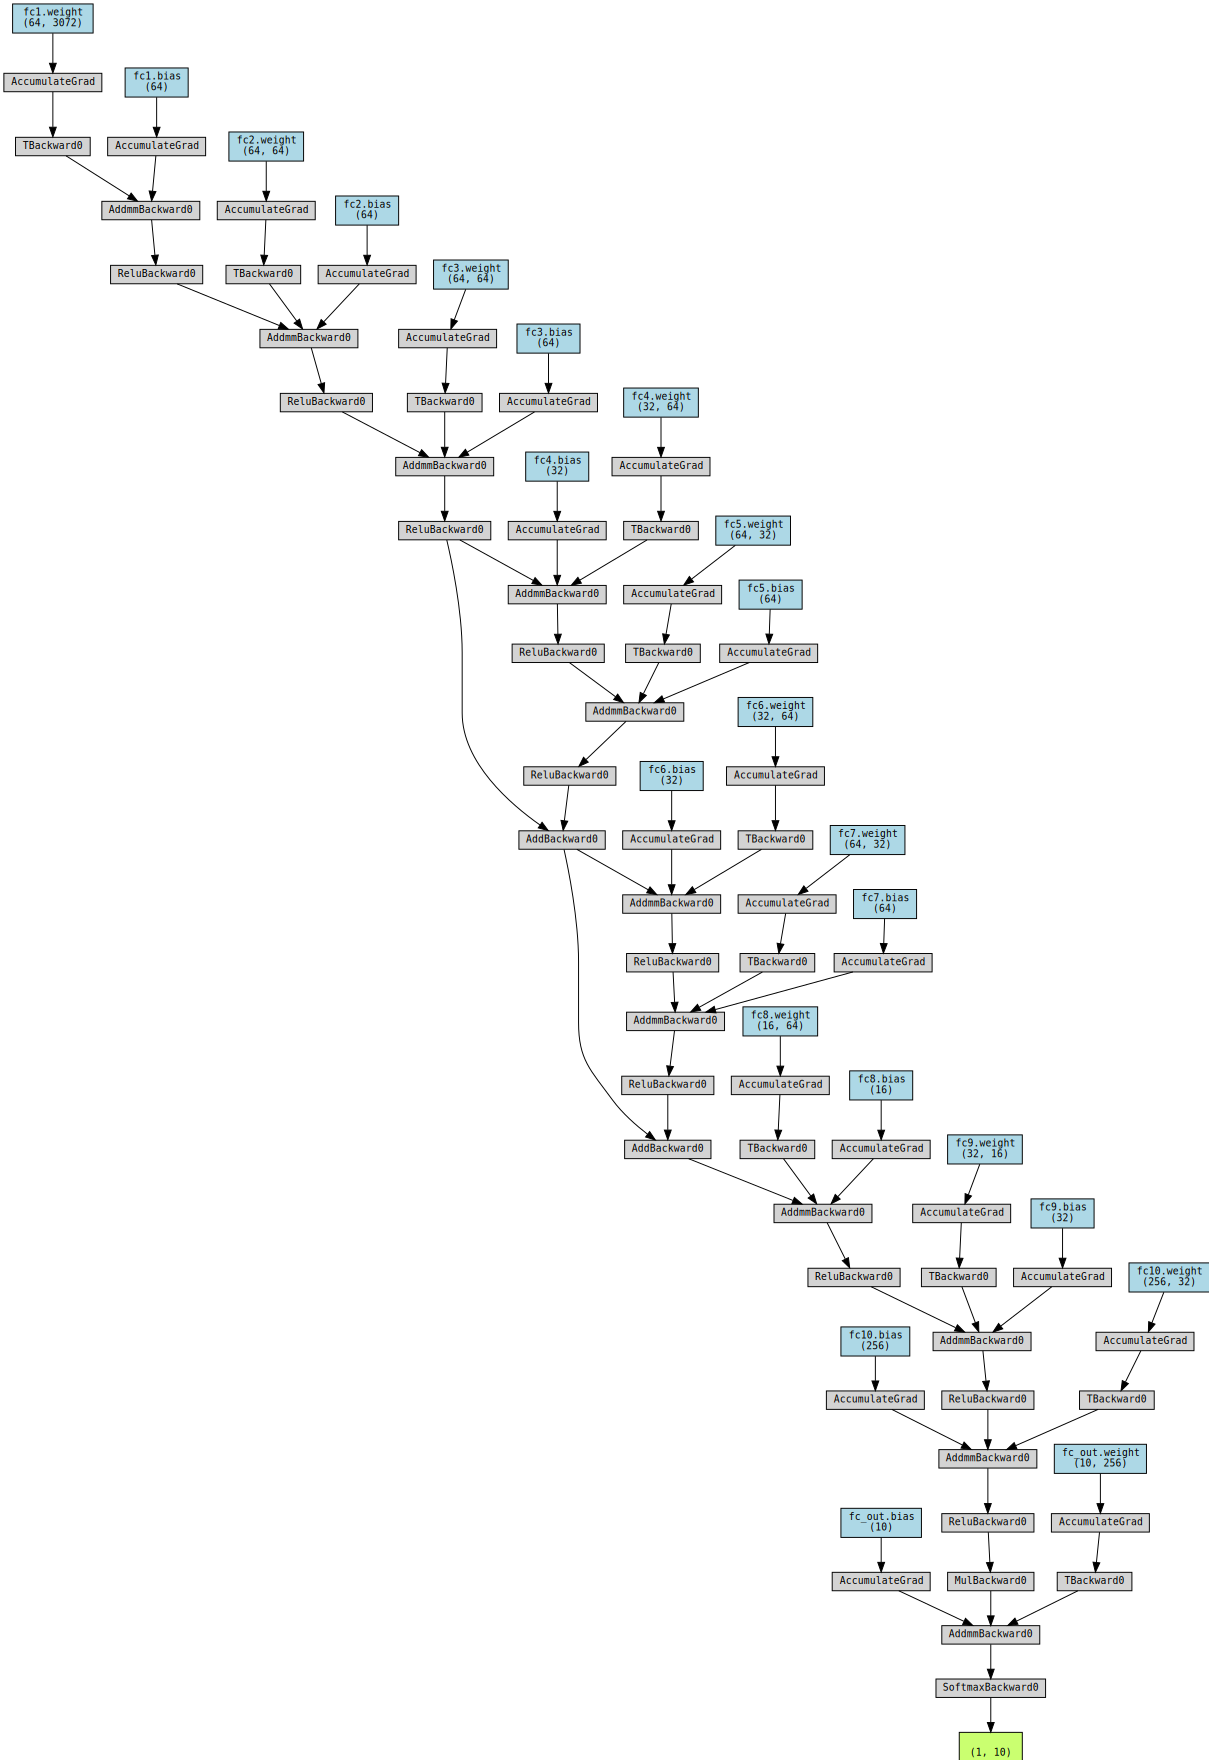

In [ ]:
# Crear una entrada de prueba (batch de 1 imagen de 32x32x3)
x_sample = torch.randn(1, 3, 32, 32)

# Obtener la salida del modelo
y_sample = model(x_sample)

# Generar el diagrama de flujo del modelo
dot = make_dot(y_sample, params=dict(model.named_parameters()))

# Guardar la imagen
dot.format = "png"
dot.render("model_visualization")

# Mostrar en Jupyter Notebook
dot

##**Personalizar Layers y Models**

Se usa nn.Module para definir la capa personalizada.

Se inicializan los pesos (self.w) y el sesgo (self.b) en la primera pasada dentro de forward(), equivalente a build() en Keras.

Se aplica la operación torch.matmul(inputs, self.w) + self.b, equivalente a tf.matmul(inputs, self.w) + self.b.

Se crean parámetros entrenables (nn.Parameter) para que PyTorch los optimice automáticamente

In [ ]:
# Definir la clase de la capa personalizada
class MyLayer(nn.Module):
    def __init__(self, units=1):
        super(MyLayer, self).__init__()
        self.units = units
        self.w = None  # Se inicializa en forward()
        self.b = None

    def forward(self, inputs):
        if self.w is None:  # Inicializar pesos en la primera pasada (similar a 'build' en Keras)
            input_dim = inputs.shape[-1]
            self.w = nn.Parameter(torch.randn(input_dim, self.units))  # Pesos inicializados normal
            self.b = nn.Parameter(torch.zeros(self.units))  # Sesgo inicializado en ceros
        return torch.matmul(inputs, self.w) + self.b

# Crear una instancia de la capa con 8 unidades
linear_layer = MyLayer(8)

# Crear una entrada de prueba (tensor de 1x2)
x = torch.ones((1, 2))

# Pasar la entrada por la capa
y = linear_layer(x)
y

Se usa nn.Linear() en lugar de tf.keras.layers.Dense().

Se aplican activaciones manualmente (F.relu() y F.elu()).

Se maneja training=False congelando los parámetros de dense3 con param.requires_grad = False.

Se usa torchinfo.summary() para imprimir un resumen del modelo (similar a model.summary() en Keras).

In [ ]:
# Definir la clase del modelo personalizado
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.dense1 = nn.Linear(2, 2)  # Entrada de tamaño 2, salida de tamaño 2
        self.dense2 = nn.Linear(2, 4)
        self.dense3 = nn.Linear(4, 8)

    def forward(self, inputs, training=False):
        x = F.relu(self.dense1(inputs))
        x = F.relu(self.dense2(x))
        x = F.elu(self.dense3(x))

        if not training:
            for param in self.dense3.parameters():
                param.requires_grad = False  # Congelar capa densa3 si no está en entrenamiento

        return x

# Crear el modelo
model = MyModel()

# Crear una entrada de prueba
x = torch.ones((1, 2)) * 2

# Pasar la entrada por el modelo
y = model(x, training=False)

print('Resultado:', y)

# Mostrar resumen del modelo
from torchinfo import summary
summary(model, input_size=(1, 2))